In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/edunet/india_flood_phase2.csv")
print(df.shape)
df.head()


(33373, 9)


,system:index,elevation,flow_accumulation,label,rain_24h,rain_72h,river_distance,slope,.geo
0,"1044,75_0",15,0.157076,1,11.696197,100.756454,0.0,0.152341,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,"1045,75_0",2,0.042404,1,9.825214,121.465105,0.0,0.196184,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,"1043,76_0",0,0.034452,1,18.855773,119.431158,0.0,0.160332,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,"1044,76_0",42,2.272412,1,18.700438,119.352406,30.0,0.277790,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,"1045,76_0",52,0.155151,1,18.632215,125.891290,0.0,0.327862,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


In [ ]:
# Drop geometry columns if present
df = df.drop(columns=[c for c in df.columns if "geometry" in c.lower()], errors="ignore")

# Replace NaNs safely
df = df.fillna(0)

print(df.isna().sum())


system:index         0
elevation            0
flow_accumulation    0
label                0
rain_24h             0
rain_72h             0
river_distance       0
slope                0
.geo                 0
dtype: int64


In [ ]:
df[["lat","lon"]].head()


,lat,lon
0,6.782280,93.829031
1,6.782280,93.918863
2,6.872112,93.739200
3,6.872112,93.829031
4,6.872112,93.918863


In [ ]:
import json

def extract_lat_lon(geo):
    try:
        g = json.loads(geo)
        lon, lat = g["coordinates"]
        return pd.Series([lat, lon])
    except:
        return pd.Series([None, None])

df[["lat","lon"]] = df[".geo"].apply(extract_lat_lon)


In [ ]:
df

,system:index,elevation,flow_accumulation,label,rain_24h,rain_72h,river_distance,slope,.geo,lat,lon
0,"1044,75_0",15,0.157076,1,11.696197,100.756454,0.000000,0.152341,"{""geodesic"":false,""type"":""Point"",""coordinates""...",6.782280,93.829031
1,"1045,75_0",2,0.042404,1,9.825214,121.465105,0.000000,0.196184,"{""geodesic"":false,""type"":""Point"",""coordinates""...",6.782280,93.918863
2,"1043,76_0",0,0.034452,1,18.855773,119.431158,0.000000,0.160332,"{""geodesic"":false,""type"":""Point"",""coordinates""...",6.872112,93.739200
3,"1044,76_0",42,2.272412,1,18.700438,119.352406,30.000000,0.277790,"{""geodesic"":false,""type"":""Point"",""coordinates""...",6.872112,93.829031
4,"1045,76_0",52,0.155151,1,18.632215,125.891290,0.000000,0.327862,"{""geodesic"":false,""type"":""Point"",""coordinates""...",6.872112,93.918863
...,...,...,...,...,...,...,...,...,...,...,...
33368,"851,369_0",4455,0.351932,1,3.231074,9.013498,67.082039,3.323153,"{""geodesic"":false,""type"":""Point"",""coordinates""...",33.192750,76.491546
33369,"852,369_0",4469,0.345926,0,3.049400,3.049400,42.426407,0.141893,"{""geodesic"":false,""type"":""Point"",""coordinates""...",33.192750,76.581378
33370,"853,369_0",4882,2.035070,0,0.000000,0.000000,30.000000,2.710543,"{""geodesic"":false,""type"":""Point"",""coordinates""...",33.192750,76.671209
33371,"854,369_0",5073,0.718754,0,0.000000,0.000000,0.000000,2.756912,"{""geodesic"":false,""type"":""Point"",""coordinates""...",33.192750,76.761041


In [ ]:
df[["lat","lon"]].head()


,lat,lon
0,6.782280,93.829031
1,6.782280,93.918863
2,6.872112,93.739200
3,6.872112,93.829031
4,6.872112,93.918863


In [ ]:
df = df.drop(columns=[".geo"], errors="ignore")


In [ ]:
df = df.fillna(0)


In [ ]:
print(df.isna().sum())


system:index         0
elevation            0
flow_accumulation    0
label                0
rain_24h             0
rain_72h             0
river_distance       0
slope                0
lat                  0
lon                  0
dtype: int64


In [ ]:
df.to_csv("/content/drive/MyDrive/edunet/india_flood_with_lat_lon.csv", index=False)


In [ ]:
!pip install earthengine-api geemap pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.5 MB/s eta 0:00:00


In [ ]:
import ee
ee.Authenticate()
ee.Initialize(project='docllm-470505')


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/edunet/india_flood_with_lat_lon.csv")
df = df.fillna(0)

df[["lat","lon"]].head()


,lat,lon
0,6.782280,93.829031
1,6.782280,93.918863
2,6.872112,93.739200
3,6.872112,93.829031
4,6.872112,93.918863


In [ ]:
import geemap

# Install geojson if not already installed
!pip install geojson

# Convert pandas → EE FeatureCollection
fc = geemap.pandas_to_ee(df, latitude="lat", longitude="lon")

In [ ]:
# Use recent window (or match your flood dates if you stored them)
end = ee.Date("2022-09-30")

smap = ee.ImageCollection("NASA_USDA/HSL/SMAP10KM_soil_moisture") \
          .filterDate(end.advance(-1,"day"), end) \
          .select("ssm") \
          .mean() \
          .rename("soil_saturation")


/usr/local/lib/python3.12/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for NASA_USDA/HSL/SMAP10KM_soil_moisture! You are using a deprecated asset.
To make sure your code keeps working, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/NASA_USDA_HSL_SMAP10KM_soil_moisture

  warnings.warn(warning, category=DeprecationWarning)


In [ ]:
soil_saturation = ee.Image(
    ee.Algorithms.If(
        smap.bandNames().size().gt(0),
        smap,
        ee.Image.constant(0).rename("soil_saturation")
    )
)


In [ ]:
sampled = soil_saturation.sampleRegions(
    collection=fc,
    scale=10000,
    geometries=False
)


In [ ]:
sampled_dfs = []
chunk_size = 5000

for i in range(0, len(df), chunk_size):
    df_chunk = df.iloc[i : i + chunk_size]

    # Convert chunk to EE FeatureCollection
    fc_chunk = geemap.pandas_to_ee(df_chunk, latitude="lat", longitude="lon")

    # Sample regions using soil_saturation
    sampled_chunk = soil_saturation.sampleRegions(
        collection=fc_chunk,
        scale=10000,
        geometries=False
    )

    # Convert sampled FeatureCollection to Python dict
    features = sampled_chunk.getInfo()["features"]

    # Extract properties into pandas
    rows = [f["properties"] for f in features]
    df_soil_chunk = pd.DataFrame(rows)
    sampled_dfs.append(df_soil_chunk)

# Concatenate all sampled dataframes
df_soil = pd.concat(sampled_dfs, ignore_index=True)

print(f"Combined sampled soil data shape: {df_soil.shape}")
df_soil.head()

Combined sampled soil data shape: (33373, 10)


,elevation,flow_accumulation,label,lat,lon,rain_24h,rain_72h,river_distance,slope,soil_saturation
0,15,0.157076,1,6.782280,93.829031,11.696197,100.756454,0.0,0.152341,0
1,2,0.042404,1,6.782280,93.918863,9.825214,121.465105,0.0,0.196184,0
2,0,0.034452,1,6.872112,93.739200,18.855773,119.431158,0.0,0.160332,0
3,42,2.272412,1,6.872112,93.829031,18.700438,119.352406,30.0,0.277790,0
4,52,0.155151,1,6.872112,93.918863,18.632215,125.891290,0.0,0.327862,0


In [ ]:
df["soil_saturation"] = df_soil["soil_saturation"]


In [ ]:
df[["lat","lon","soil_saturation"]]

,lat,lon,soil_saturation
0,6.782280,93.829031,0
1,6.782280,93.918863,0
2,6.872112,93.739200,0
3,6.872112,93.829031,0
4,6.872112,93.918863,0
...,...,...,...
33368,33.192750,76.491546,0
33369,33.192750,76.581378,0
33370,33.192750,76.671209,0
33371,33.192750,76.761041,0


In [ ]:
df.to_csv("/content/drive/MyDrive/edunet/india_flood_with_lat_lon_soil.csv", index=False)


In [ ]:
import pandas as pd

df = pd.read_csv("india_flood_with_lat_lon_soil.csv")

# basic cleanup
df = df.drop(columns=[".geo"], errors="ignore")
df = df.fillna(0)

print(df.shape)
df.head()


(33373, 11)


,system:index,elevation,flow_accumulation,label,rain_24h,rain_72h,river_distance,slope,lat,lon,soil_saturation
0,"1044,75_0",15,0.157076,1,11.696197,100.756454,0.0,0.152341,6.782280,93.829031,0
1,"1045,75_0",2,0.042404,1,9.825214,121.465105,0.0,0.196184,6.782280,93.918863,0
2,"1043,76_0",0,0.034452,1,18.855773,119.431158,0.0,0.160332,6.872112,93.739200,0
3,"1044,76_0",42,2.272412,1,18.700438,119.352406,30.0,0.277790,6.872112,93.829031,0
4,"1045,76_0",52,0.155151,1,18.632215,125.891290,0.0,0.327862,6.872112,93.918863,0


In [ ]:
TARGET = "label"

FEATURES = [
    "lat",
    "lon",
    "rain_24h",
    "rain_72h",
    "soil_saturation",
    "elevation",
    "slope",
    "flow_accumulation",
    "river_distance"
]

X = df[FEATURES]
y = df[TARGET]


In [ ]:
scale_pos_weight = (y == 0).sum() / (y == 1).sum()
print("scale_pos_weight:", scale_pos_weight)


scale_pos_weight: 0.02809525276485629


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

scale_pos_weight = neg / pos
print("neg:", neg, "pos:", pos)
print("scale_pos_weight:", scale_pos_weight)


neg: 730 pos: 25968
scale_pos_weight: 0.028111521873074554


In [ ]:
y.value_counts()


,count
label,
1,32461
0,912


In [ ]:
# Make flood = 1, non-flood = 0
df["label"] = 1 - df["label"]
y = df["label"]

y.value_counts()


,count
label,
0,32461
1,912


In [ ]:
neg = (y == 0).sum()
pos = (y == 1).sum()

scale_pos_weight = neg / pos

print("neg:", neg)
print("pos:", pos)
print("scale_pos_weight:", scale_pos_weight)


neg: 32461
pos: 912
scale_pos_weight: 35.593201754385966


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=8,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="auc"
)

[LightGBM] [Info] Number of positive: 730, number of negative: 25968
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1900
[LightGBM] [Info] Number of data points in the train set: 26698, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.027343 -> initscore=-3.571576
[LightGBM] [Info] Start training from score -3.571576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=8,
               n_estimators=600, n_jobs=-1, num_leaves=64, random_state=42,
               scale_pos_weight=np.float64(35.593201754385966), subsample=0.8)

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report

y_prob = model.predict_proba(X_val)[:,1]

# Lower threshold = safer
y_pred = (y_prob > 0.25).astype(int)

print("ROC-AUC:", roc_auc_score(y_val, y_prob))
print(classification_report(y_val, y_pred))


ROC-AUC: 0.983833815960722
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6493
           1       0.65      0.81      0.72       182

    accuracy                           0.98      6675
   macro avg       0.82      0.90      0.85      6675
weighted avg       0.99      0.98      0.98      6675



In [ ]:
def flood_override(row):
    if row["rain_72h"] > 150 and row["river_distance"] < 2000:
        return 1
    return row["label"]

df["final_flood_label"] = df.apply(flood_override, axis=1)


In [ ]:
import joblib
joblib.dump(model, "flood_model_v2_final.pkl")


['flood_model_v2_final.pkl']

In [ ]:
!pip install shap


/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


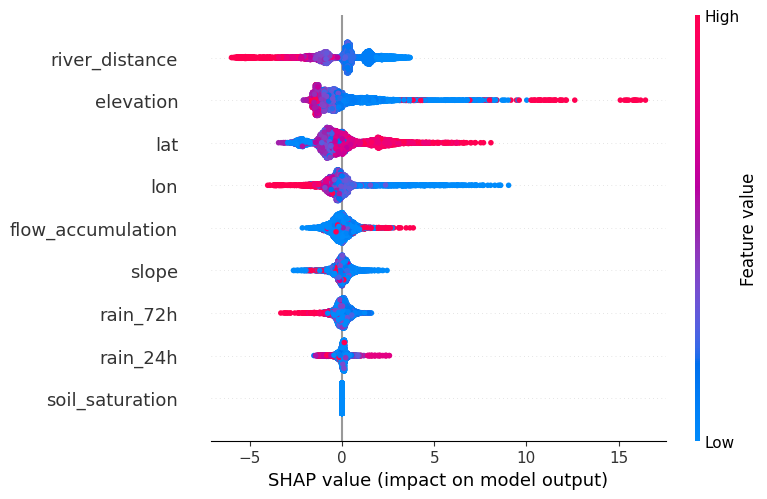

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

shap.summary_plot(shap_values, X_val)